--------------------------------------

### 新题目

I have a dictionary with each key holding a list of float values. These lists are not the same size.

I'd like to convert this dictionary to a dataframe so that I can perform some analysis functions on the data easily (min, max, average, standard deviation, more).

My dictionary looks like this:

{
    'key1': [10, 100.1, 0.98, 1.2],
    'key2', [72.5],
    'key3', [1, 5.2, 71.2, 9, 10.11, 12.21, 65, 7]
}
What is the best way to get this into a dataframe so that I can utilize basic functions like sum, mean, describe, std?

The examples I find (like the link above), all assume each of the keys have the same number of values in the list.


打算使用numpy，构建数组来做。

同时存在疑问，提问者准备对属性缺失的样本怎么处理，是在计算与该属性相关的量时直接忽略该样本，还是用缺省值代替。

实验：

In [1]:
a = [[1,2,3], [4,5], [6], [7,8]]

In [2]:
import numpy as np

In [3]:
b = np.array(a)

In [12]:
b[:,0]

IndexError: too many indices for array

In [14]:
c = [[1,2,3], [4,5,2], [6,2,2], [7,2,8]]
d = np.array(c)

In [15]:
d

array([[1, 2, 3],
       [4, 5, 2],
       [6, 2, 2],
       [7, 2, 8]])

由此，发现，以长短不一的list为元素的list同样可以使用np.array()进行转换，但是，转换之后并不具备ndarray的某些性质

参考别人提供的解法：

#### 解1

In [16]:
import pandas as pd

In [18]:
d={
    'key1': [10, 100.1, 0.98, 1.2],
    'key2': [72.5],
    'key3': [1, 5.2, 71.2, 9, 10.11, 12.21, 65, 7]
}

df=pd.DataFrame.from_dict(d,orient='index').transpose()
df

,key3,key2,key1
0,1.00,72.5,10.00
1,5.20,NaN,100.10
2,71.20,NaN,0.98
3,9.00,NaN,1.20
4,10.11,NaN,NaN
5,12.21,NaN,NaN
6,65.00,NaN,NaN
7,7.00,NaN,NaN


漂亮，接下来，使用numpy进行进一步的计算，因为在numpy中有可以忽略NaN项的函数：

In [20]:
import numpy as np
np.nanmean(df[['key1']])

28.07

#### 解2

沿用上面解1中的部分变量：

In [23]:
df = pd.DataFrame({key : pd.Series(vals) for key, vals in d.items()})
df

,key1,key2,key3
0,10.00,72.5,1.00
1,100.10,NaN,5.20
2,0.98,NaN,71.20
3,1.20,NaN,9.00
4,NaN,NaN,10.11
5,NaN,NaN,12.21
6,NaN,NaN,65.00
7,NaN,NaN,7.00


其中：

In [24]:
{key : pd.Series(vals) for key, vals in d.items()}

{'key1': 0     10.00
 1    100.10
 2      0.98
 3      1.20
 dtype: float64, 'key2': 0    72.5
 dtype: float64, 'key3': 0     1.00
 1     5.20
 2    71.20
 3     9.00
 4    10.11
 5    12.21
 6    65.00
 7     7.00
 dtype: float64}

实验：

In [28]:
d.items()

[('key3', [1, 5.2, 71.2, 9, 10.11, 12.21, 65, 7]),
 ('key2', [72.5]),
 ('key1', [10, 100.1, 0.98, 1.2])]

In [27]:
li = [['q', 1], ['w', 2], ['e', 3]]
li2dict = {key: val for key, val in li}
li2dict

{'e': 3, 'q': 1, 'w': 2}

看来对于pandas和numpy还要好好的学一学，以及一些小技巧，以前只知道[item for item in li]之类的用法，原来字典也是可以的

----------------------------------------------
### 新题目
If i have an numpy array
```
A=[[-4. -4. -4.]                           #(6,3)
[-8. -8. -8.]
[-1. -1. -1.]
[-5. -5. -5.]
[ 2.  2.  2.]
[-2. -2. -2.]]
```
I need norm of each row as (2,3) My solution is:

np.linalg.norm(A,axis=1)

My output is
```
[6.92820323  13.85640646   1.73205081   8.66025404   3.46410162  3.46410162]
```
Required output is:
```
[[  6.92820323  13.85640646]
[  1.73205081   8.66025404]
[  3.46410162   3.46410162]]
```
I want to get the required output just in one step without reshaping the resultant numpy array.because i have a large data set and i have to perform this operation repeatedly. Any suggestion ?



In [33]:
A=[[-4., -4., -4.],   #(6,3)
[-8., -8., -8.],
[-1., -1., -1.],
[-5., -5., -5.],
[ 2.,  2.,  2.],
[-2., -2., -2.]]
A = np.array(A)
ans = np.linalg.norm(A,axis=1)
ans = ans.reshape((3,2))
ans

array([[  6.92820323,  13.85640646],
       [  1.73205081,   8.66025404],
       [  3.46410162,   3.46410162]])

---------------------------
### 关于类的变量和对象的变量

In [66]:
class test():
    angle = 0
    def __init__(self):
        self.angle1 = self.angle  # when __init__() run,it can't find a angle of your object,
                                  # so it will go to find the global angle in your class
        
    def show(self):
        print self.angle1
    
    def change(self):
        self.angle = 1   # this self.angle is a val for object
        print self.angle
        
    def change_class(self):
        test.angle = 1   # if you want to change the angle of your class,this can be worked

In [67]:
q = test()
q.show()
q.change()
p = test()
p.show()
q.change_class()
p = test()
p.show()

0
1
0
1


-------------------------------
### 问题：
一个文件中有两行字符串，第一行是keys，第二行是每个key对应的value，现需要读出来，组织成dict

这个问题使用zip()可以将key和value对应，然后使用一个生成器

In [69]:
fp = open('test.txt')
s1 = fp.readline()
s2 = fp.readline()
s = zip(s1, s2)
ans = {key : val for key,val in s}
print ans

{'q': '1', '\n': '\n', 'r': '4', 'e': '3', 'w': '2'}


但是此处把换行符也包含进来了，用strip()处理读出的行信息，将其去掉

In [70]:
fp = open('test.txt')
s1 = fp.readline().strip()
s2 = fp.readline().strip()
s = zip(s1, s2)
ans = {key : val for key,val in s}
print ans

{'q': '1', 'r': '4', 'e': '3', 'w': '2'}


-------------------------------
### sklearn 的学习
有人在提问，是关于是关于sklearn上的内容，顺便看了下，试了试

In [5]:
import pydotplus 
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

True

--------------------
### 新问题

https://stackoverflow.com/questions/42876037/create-new-list-initiate/42876251#42876251

有点链表指针的感觉，提问者没有控制好‘指针’的值

In [21]:
class Cellule(object):
    def __init__(self, entier):
        self.entier=entier
        self.suiv=None

L1=Cellule(1)
L1.suiv=Cellule(2)
L1.suiv.suiv=Cellule(3)
L1.suiv.suiv.suiv=Cellule(4)

L2=Cellule(11)
L2.suiv=Cellule(12)
L2.suiv.suiv=Cellule(13)
L2.suiv.suiv.suiv=Cellule(14)

p1=L1
p2=L2
L3=Cellule(0)
p3=L3

while 1:
    if p1:
        p3.suiv = Cellule(p1.entier)
        p3 = p3.suiv
        p1 = p1.suiv

    if p2:
        p3.suiv = Cellule(p2.entier)
        p3 = p3.suiv
        p2 = p2.suiv
        
    if p1 == None and p2 == None:
        break

p4=L3.suiv
while p4:
    print(p4.entier)
    p4=p4.suiv

1
11
2
12
3
13
4
14


------------------------

--------------------
### 新问题

提问者想在打印自己定义的类时，输出自己想打印的内容和格式

In [10]:
import random
class Student():
    def __init__(self, name, years_at_umich=1):
        self.name = name
        self.years_UM = years_at_umich
        self.bonus_points = random.randrange(1000)
        self.programs_written = 0
        
    def __str__(self):
        return "My name is %s. I've been in college for %d years and I've written %d programs" \
            %(self.name, self.years_UM, self.programs_written)

In [11]:
test_stu = Student("Mike")
print test_stu

My name is Mike. I've been in college for 1 years and I've written 0 programs


---------------------
### 新问题
关于编码问题

In [44]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as mpl

mpl.rc('font', family='sans-serif')
mpl.rc('text', usetex=True)

fig = mpl.figure()
ax = fig.add_subplot(1,1,1)

text_1 = "This is the first line"
text_2 = "And here comes the second one"

completeText = [text_1, text_2]

textIn = '⧹n'.join(map(str, completeText))

ax.text(0.2,0.5,textIn)


fig.show()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 22: ordinal not in range(128)

发现问题处在`⧹n`中的`'⧹'`，改成`'\'`就好了

同时，应提问者要求，加上bullet标识，可以看到latex渲染的小圆点和字体

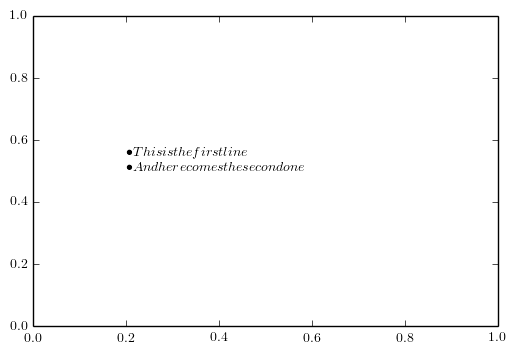

In [54]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as mpl

mpl.rc('font', family='sans-serif')
mpl.rc('text', usetex=True)

fig = mpl.figure()
ax = fig.add_subplot(1,1,1)

text_1 = r"{\bullet}This is the first line"
text_2 = r"{\bullet}And here comes the second one"

completeText = [text_1, text_2]

textIn = '\n'.join(map(str, completeText))

ax.text(0.2,0.5,textIn)


fig.show()

----------------------
### 新问题
I wrote a code that translates numbers into text:

In [72]:
num = raw_input("Insert a number > ")
numbers = {'0': '', '1': 'One ', '2': 'Two ', '3': 'Three ', '4': 'Four ',
           '5': 'Five ', '6': 'Six ', '7': 'Seven ', '8': 'Eight ', '9': 'Nine '}
tens = {'0': '', '1': 'Ten ', '2': 'Twenty ', '3': 'Thirty ', '4': 'Forty ',
        '5': 'Fifty ', '6': 'Sixty ', '7': 'Seventy ', '8': 'Eighty ', '9': 'Ninety '}
numbers_teens = {'0': '','1': 'Eleven ', '2': 'Twelve ', '3': 'Thirteen ',
                 '4': 'Fourteen ', '5': 'Fifteen ', '6': 'Sixteen ', '7': 'Seventeen ',
                 '8': 'Eighteen ', '9': 'Nineteen '}
numbers_teeens = {'0' : '', '1': 'One', '2': 'Two', '3': 'Three', '4': 'Four',
                  '5': 'Five', '6': 'Six', '7': 'Seven', '8': 'Eight', '9': 'Nine',
                  '11': 'Eleven', '12': 'Twelve', '13': 'Thirteen', '14': 'Fourteen',
                  '15': 'Fifteen', '16': 'Sixteen', '17': 'Seventeen', '18': 'Eighteen',
                  '19': 'Nineteen'}
numbers_hundreds = {}
numbers_thousands = {}
numbers_ten_thousands = {}
numbers_teen_thousands = {}
numbers_hundred_thousands = {}

#Creates dicts
for k,v in numbers.items():
    numbers_hundreds.update({k: v.title() + 'Hundred '})
if k == 0:
    numbers_hundreds.update({k: v.title() + ''})
if '0' in numbers_thousands:
    numbers_thousands.update({k: v.title() + ''})
numbers_thousands.update({k: v.title() + 'Thousand, '})

for k1,v1 in tens.items():
    numbers_ten_thousands.update({k1: v1.title()})

for kt,vt in numbers_teens.items():
    numbers_teen_thousands.update({kt: vt.title() + 'Thousand '})
if kt == 0:
    numbers_teen_thousands.update({kt: vt.title() + ''})

for k2,v2 in numbers_hundreds.items():
    numbers_hundred_thousands.update({k2: v2.title() + ''})

p = len(num)
i = p - 2
if p == 1:
    print numbers[num]
if p == 2:
    print tens[num[0]] + numbers_teeens[num[1]]

if p == 3:
    print numbers_hundreds[num[0]] + tens[num[1]] + numbers_teeens[num[2]]

if p == 4:
    print(numbers_thousands[num[0]] + numbers_hundreds[num[1]] + tens[num[2]]
           + numbers_teeens[num[3]])

if p == 5:
    print (numbers_ten_thousands[num[0]] + numbers_thousands[num[1]]
           + numbers_hundreds[num[2]] + tens[num[3]] + numbers_teeens[num[4]])

if p == 6:
    print (numbers_hundred_thousands[num[0]] + numbers_ten_thousands[num[1]]
           + numbers_thousands[num[2]]+ numbers_hundreds[num[3]] + tens[num[4]]
           + numbers_teeens[num[5]])

Insert a number > 1234


KeyError: '1'

But when my input is 112, my output is One Hundred Ten Two, (and the same goes to all of the teens, {11,12,13,14,15,16,17,18,19}). It should be One Hundred Eleven, but I don't know how to do it...

In [112]:
num = raw_input("Insert a number > ")

tens = {'0': '', '1': 'Ten ', '2': 'Twenty ', '3': 'Thirty ', '4': 'Forty ',
        '5': 'Fifty ', '6': 'Sixty ', '7': 'Seventy ', '8': 'Eighty ', '9': 'Ninety '}
numbers_teens = {'0': '','1': 'Eleven ', '2': 'Twelve ', '3': 'Thirteen ',
                 '4': 'Fourteen ', '5': 'Fifteen ', '6': 'Sixteen ', '7': 'Seventeen ',
                 '8': 'Eighteen ', '9': 'Nineteen '}
numbers_teeens = {'0' : '', '1': 'One ', '2': 'Two ', '3': 'Three ', '4': 'Four ',
                  '5': 'Five ', '6': 'Six ', '7': 'Seven ', '8': 'Eight ', '9': 'Nine ',
                  '11': 'Eleven ', '12': 'Twelve ', '13': 'Thirteen ', '14': 'Fourteen ',
                  '15': 'Fifteen ', '16': 'Sixteen ', '17': 'Seventeen ', '18': 'Eighteen ',
                  '19': 'Nineteen '}


def two_numbers(num):
    if int(num) < 20:
        out_ans = numbers_teeens[num]
    else:
        out_ans = tens[num[0]] + numbers_teeens[num[1]]
    
    return out_ans

def three_numbers(num):
    out_ans = ''
    if int(num) > 99:
        out_ans += two_numbers(num[0]) + 'Hundred '
        
    out_ans += two_numbers(num[-2:])
    
    return out_ans
    
def num2text(num):
    out_ans = ''
    if int(num) > 999:
        out_ans += three_numbers(num[:-3]) + 'Thousand, '
    
    out_ans += three_numbers(num[-3:])
        
    print out_ans
    return out_ans

num2text(num)

Insert a number > 123124
One Hundred Twenty Three Thousand, One Hundred Twenty Four 


'One Hundred Twenty Three Thousand, One Hundred Twenty Four '

-----------------------
#### 类型判断

In [2]:
type(5) is int

True

In [3]:
isinstance(5, int)

True